# <div style="text-align: center; padding: 20px; border: 2px solid #4CAF50; border-radius: 10px; background-color: #f9f9f9;">
  <h1 style="color: #4CAF50;">Melbourne Housing Price Prediction</h1>
</div>

<div style="text-align: center; margin: 20px;">
</div>

---

## <div style="padding: 10px; background-color: #f0f8ff; border-left: 5px solid #4CAF50;">Introduction</div>
This analysis focuses on predicting property prices in Melbourne, leveraging a comprehensive dataset of housing features and machine learning techniques.

Accurately predicting housing prices is a challenging yet essential problem for real estate stakeholders, including buyers, sellers, and investors. 

Our goal is to develop predictive models using machine learning techniques to estimate property prices and evaluate their performance.

This project will:
- Perform exploratory data analysis (EDA) to uncover trends.
- Identify key factors influencing housing prices.
- Build a model to predict fair values of houses.

---

## <div style="padding: 10px; background-color: #f0f8ff; border-left: 5px solid #4CAF50;">Prepared By</div>
<div style="padding: 10px; text-align: center; border: 1px solid #ddd; border-radius: 5px; background-color: #fff;">
  <strong>Sujith Madesh</strong><br>
  <em>ID: 474083</em><br>
  <strong>Jakub Fiłon</strong><br>
  <em>ID: 443653</em>
</div>

---




## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">Import Libraries</div>

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import TargetEncoder, QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">1. Read and Explain Dataset</div>

In [242]:
df = pd.read_csv('melb_data.csv')
print(df.head())
print(df.info())

       Suburb           Address  Rooms Type      Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0           NaN        NaN       Yarra   -37.7996    144.9984  Northern Metropolitan         4019.0
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0       Yarra   -37.8079    144.9934  Northern Metropolitan         4019.0
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0       Yarra   -37.8093    144.9944  Northern Metropolitan         4019.0
3  Abbotsford  40 Federation La      3    h   850000.0     PI  B

<div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Property Feature Descriptions</h1>
</div>

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<ul>
    <li><b>Rooms:</b> Number of rooms.</li>
    <li><b>Price:</b> Price in dollars.</li>
    <li><b>Method:</b> 
        <ul>
            <li>S - Property sold.</li>
            <li>SP - Property sold prior.</li>
            <li>PI - Property passed in.</li>
            <li>PN - Sold prior not disclosed.</li>
            <li>SN - Sold not disclosed.</li>
            <li>NB - No bid.</li>
            <li>VB - Vendor bid.</li>
            <li>W - Withdrawn prior to auction.</li>
            <li>SA - Sold after auction.</li>
            <li>SS - Sold after auction price not disclosed.</li>
            <li>N/A - Price or highest bid not available.</li>
        </ul>
    </li>
    <li><b>Type:</b> 
        <ul>
            <li>br - Bedroom(s).</li>
            <li>h - House, cottage, villa, semi, terrace.</li>
            <li>u - Unit, duplex.</li>
            <li>t - Townhouse.</li>
            <li>dev site - Development site.</li>
            <li>o res - Other residential.</li>
        </ul>
    </li>
    <li><b>SellerG:</b> Real Estate Agent.</li>
    <li><b>Date:</b> Date sold.</li>
    <li><b>Distance:</b> Distance from CBD.</li>
    <li><b>Regionname:</b> General region (West, North West, North, North East, etc.).</li>
    <li><b>Propertycount:</b> Number of properties that exist in the suburb.</li>
    <li><b>Bedroom2:</b> Scraped number of bedrooms (from a different source).</li>
    <li><b>Bathroom:</b> Number of bathrooms.</li>
    <li><b>Car:</b> Number of car spots.</li>
    <li><b>Landsize:</b> Land size.</li>
    <li><b>BuildingArea:</b> Building size.</li>
    <li><b>CouncilArea:</b> Governing council for the area.</li>
</ul>
</div>


In [243]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Drop unnecessary columns
df.drop(['Date', 'Address'], axis=1, inplace=True)

missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print(missing_data)
print(df.describe())

BuildingArea    47.496318
YearBuilt       39.580265
CouncilArea     10.081001
Car              0.456554
dtype: float64
              Rooms         Price      Distance      Postcode      Bedroom2      Bathroom           Car       Landsize  BuildingArea    YearBuilt     Lattitude    Longtitude  Propertycount          Year         Month
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000  13580.000000  13580.000000   13580.000000  13580.000000  13580.000000
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728      1.534242      1.610075     558.416127    151.967650  1964.684217    -37.809203    144.995216    7454.417378   2016.533432      7.052283
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921      0.691712      0.962634    3990.669241    541.014538    37.273762      0.079260      0.103916    4378.581772      0.498899      2.536034
min        1.

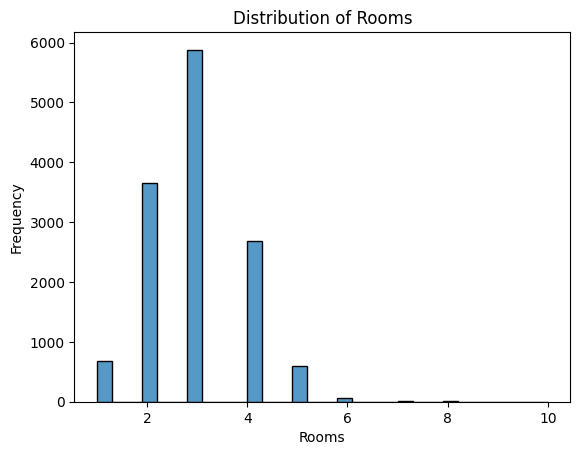

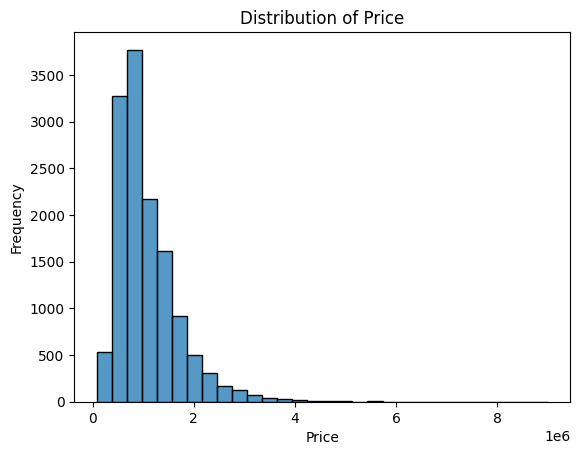

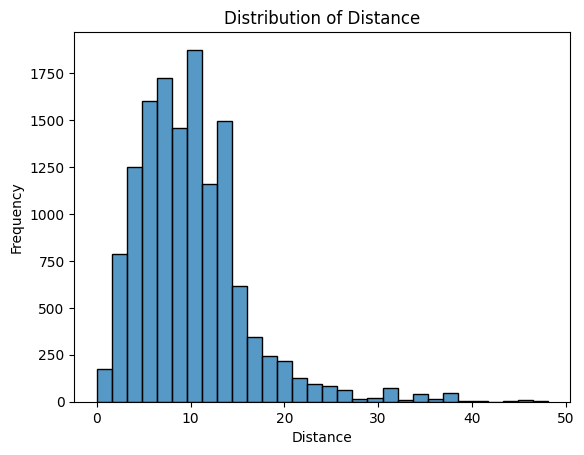

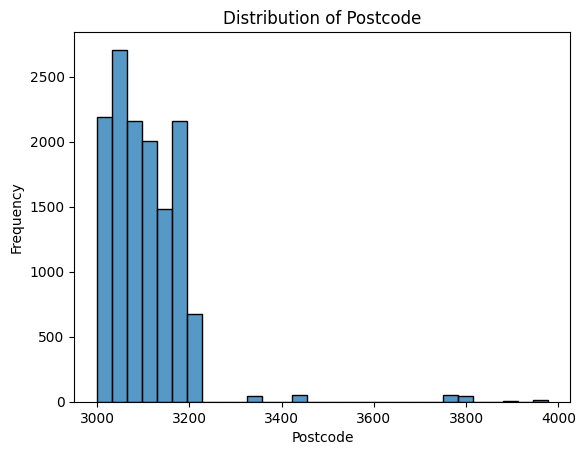

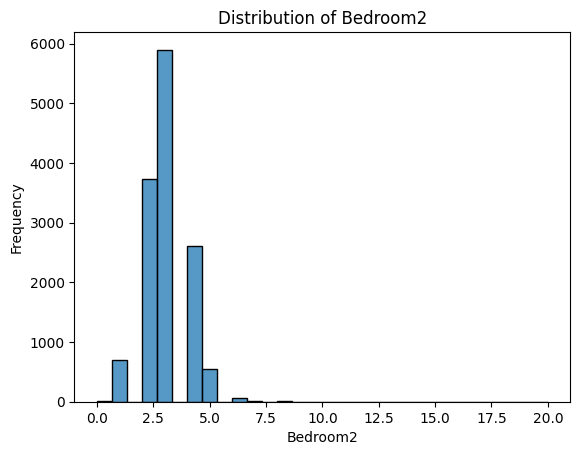

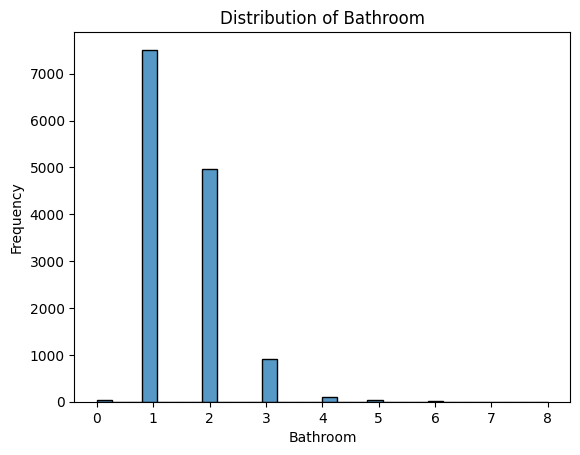

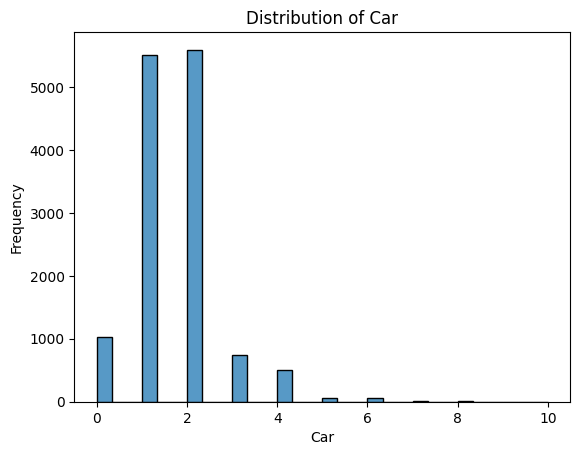

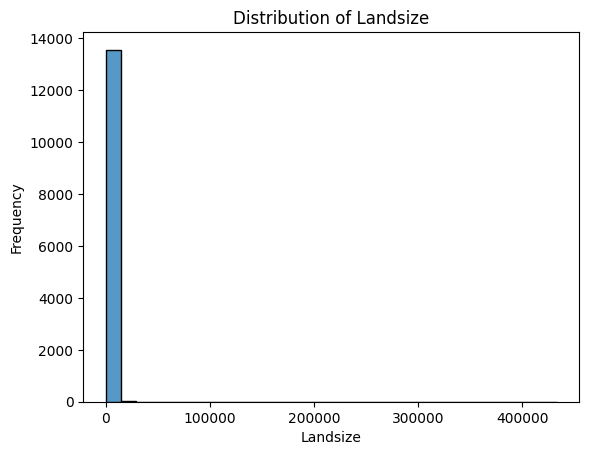

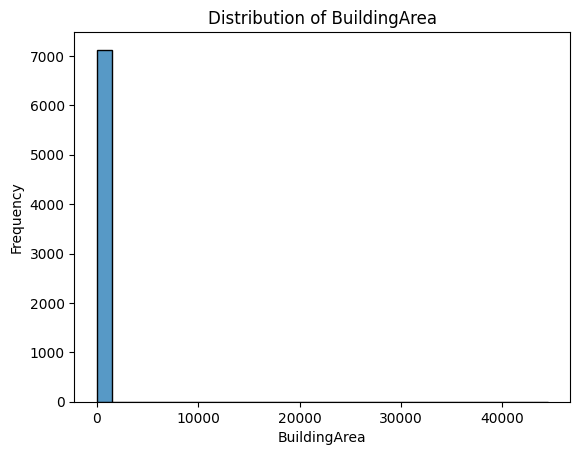

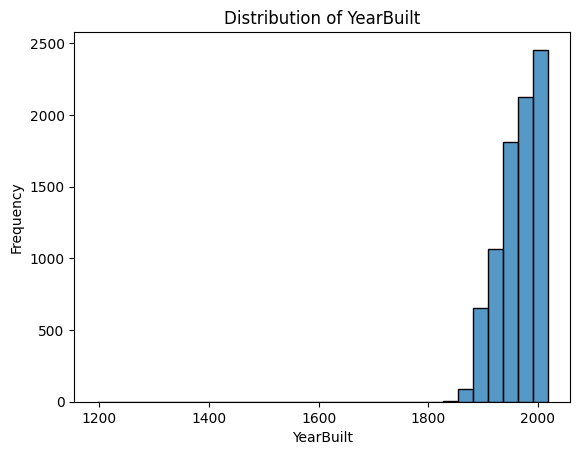

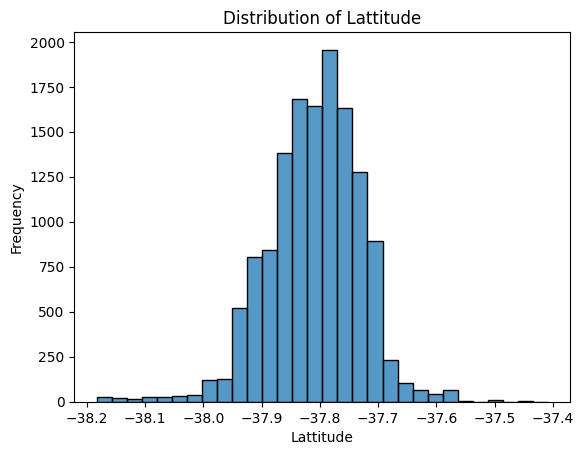

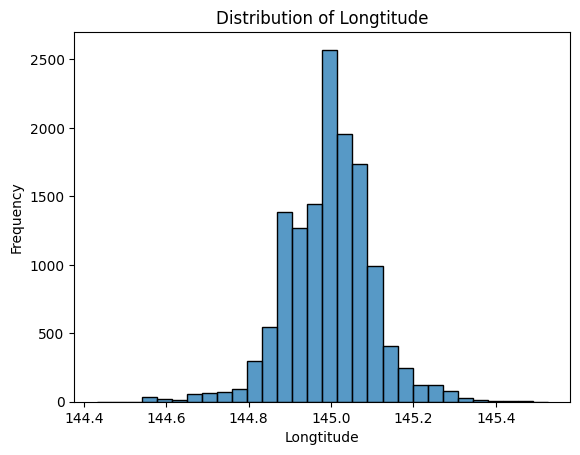

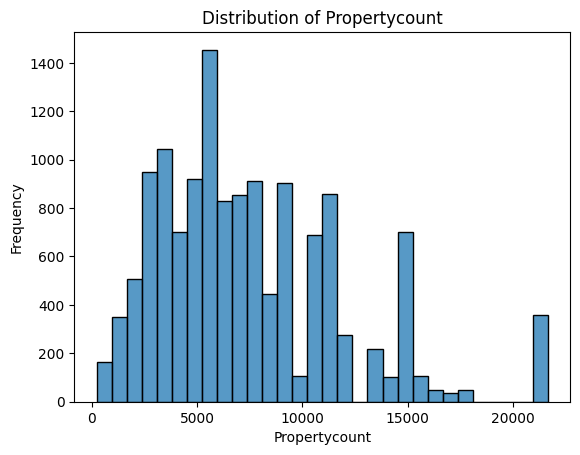

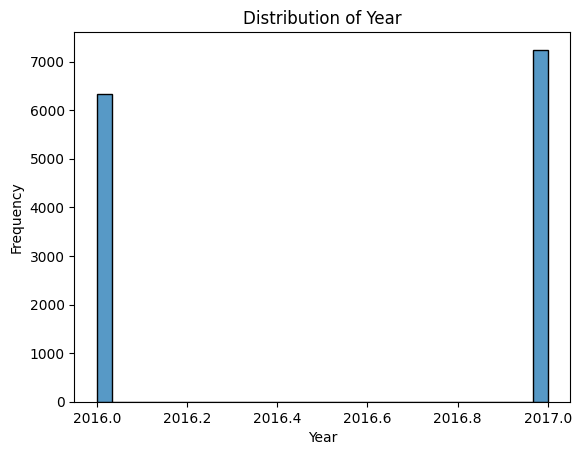

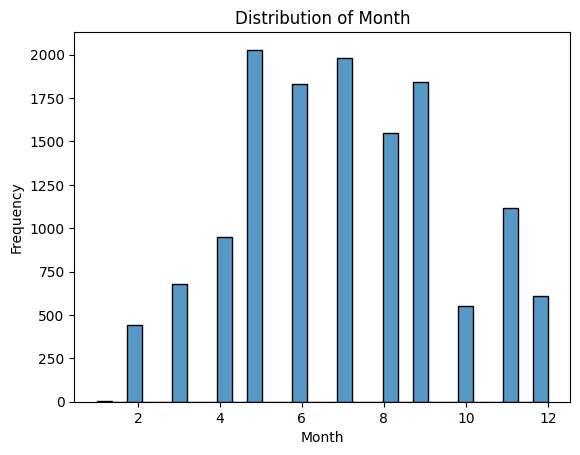

In [244]:
# Visualize distributions of numerical features
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

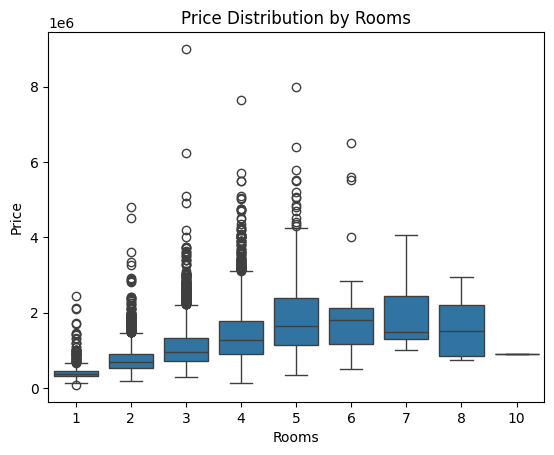

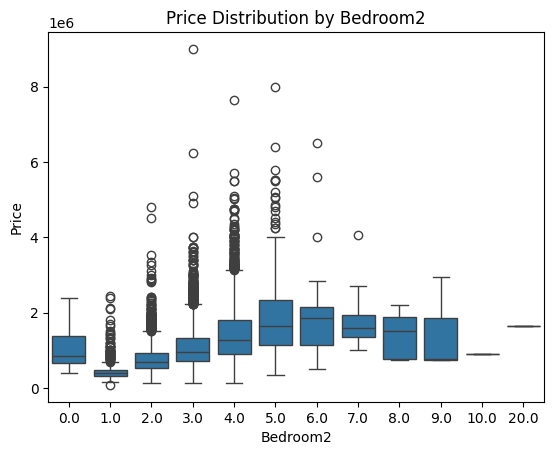

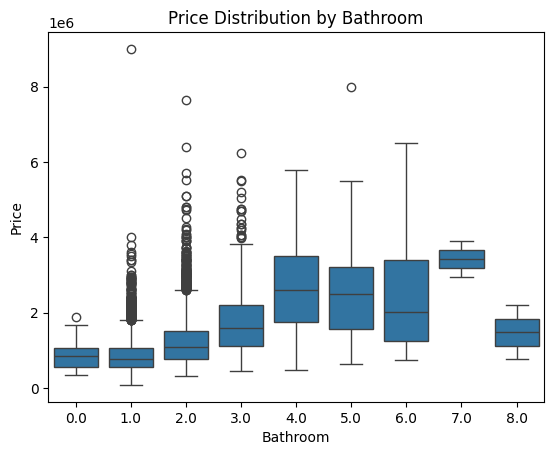

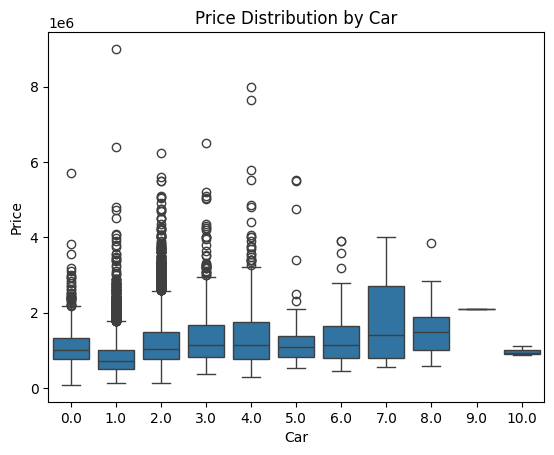

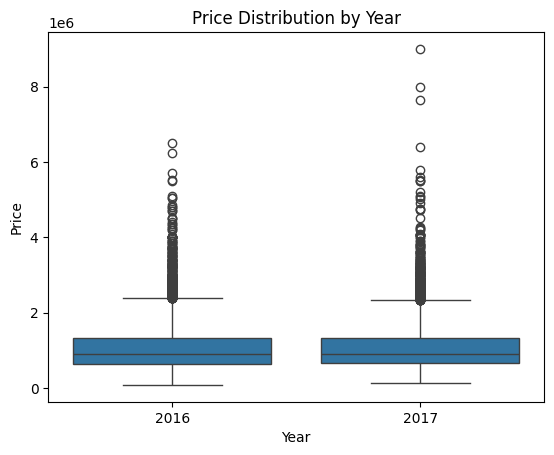

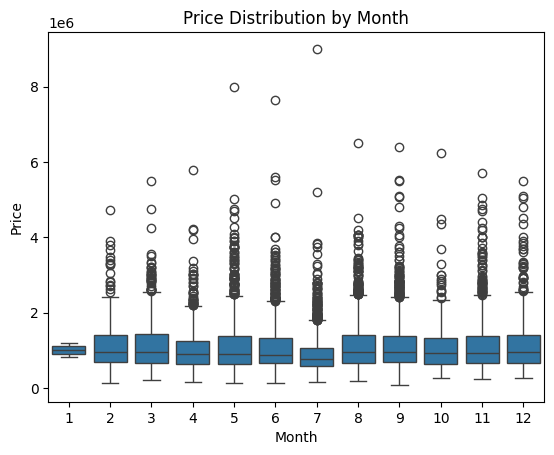

In [245]:
# Analyze impact of numerical features on Price
for col in df.select_dtypes(include='number').columns:
    if df[col].nunique() < 20:
        plt.figure()
        sns.boxplot(x=col, y='Price', data=df)
        plt.title(f'Price Distribution by {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

In [246]:
# Fill missing values
df['CouncilArea'] = df['CouncilArea'].fillna('Missing')

In [247]:
# Create a train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [248]:
# Encode Suburb, SellerG, CouncilArea using TargetEncoder
encoder = TargetEncoder(target_type='continuous')

df_train['Suburb'] = encoder.fit_transform(df_train[['Suburb']], df_train['Price'])
df_test['Suburb'] = encoder.transform(df_test[['Suburb']])

df_train['SellerG'] = encoder.fit_transform(df_train[['SellerG']], df_train[['Price']])
df_test['SellerG'] = encoder.transform(df_test[['SellerG']])

df_train['CouncilArea'] = encoder.fit_transform(df_train[['CouncilArea']], df_train[['Price']])
df_test['CouncilArea'] = encoder.transform(df_test[['CouncilArea']])

# Perform One Hot Encoding on Type, Method, Regionname, Year
df_train = pd.get_dummies(df_train, columns=['Type', 'Method', 'Regionname', 'Year'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Type', 'Method', 'Regionname', 'Year'], drop_first=True)

/home/essa/housing_prices/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/essa/housing_prices/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [249]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 12167 to 2732
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 10864 non-null  float64
 1   Rooms                                  10864 non-null  int64  
 2   Price                                  10864 non-null  float64
 3   SellerG                                10864 non-null  float64
 4   Distance                               10864 non-null  float64
 5   Postcode                               10864 non-null  float64
 6   Bedroom2                               10864 non-null  float64
 7   Bathroom                               10864 non-null  float64
 8   Car                                    10815 non-null  float64
 9   Landsize                               10864 non-null  float64
 10  BuildingArea                           5708 non-null   float64
 11  Year

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>Let's use IterativeImputer because more simple imputation methods will replace NaNs with values that are not even close to true values</b><br>
 </div>

In [250]:
# Impute missing values in YearBuilt and BuildingArea using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df_train_imputed = imputer.fit_transform(df_train)
df_test_imputed = imputer.transform(df_test)

df_train = pd.DataFrame(df_train_imputed, columns=df_train.columns)
df_test = pd.DataFrame(df_test_imputed, columns=df_test.columns)

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<ul>
    <li><b>We could see visible skewness in distributions of some features but using QuantileTransformer should take care of the outliers </b><br></li>
    <li><b> We need to transform the data into uniform and normal distributions to make it suitable for different models </b><br></li>
 </ul>
    
 </div>

In [251]:
# Transform numerical features using QuantileTransformer (uniform and normal distributions)
scaler = QuantileTransformer(output_distribution='uniform', random_state=0)
df_train_uniform = df_train.copy()
df_test_uniform = df_test.copy()
df_train_uniform.loc[:, :'Month'] = scaler.fit_transform(df_train.loc[:, :'Month'])
df_test_uniform.loc[:, :'Month'] = scaler.transform(df_test.loc[:, :'Month'])


scaler = QuantileTransformer(output_distribution='normal', random_state=0)
df_train_normal = df_train.copy()
df_test_normal = df_test.copy()
df_train_normal.loc[:, :'Month'] = scaler.fit_transform(df_train.loc[:, :'Month'])
df_test_normal.loc[:, :'Month'] = scaler.transform(df_test.loc[:, :'Month'])

In [252]:
# Perform chi-squared test for Price with all numerical features
for col in df_train_normal.select_dtypes(include='number').columns:
    if col == 'Price':
        continue
    crosstab = pd.crosstab(df_train_normal[col], df_train_normal['Price'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f'{col} chi2: {chi2}, p-value: {p}')

Suburb chi2: 2415677.9868628904, p-value: 1.0
Rooms chi2: 19769.596012730875, p-value: 3.267924875103695e-88
SellerG chi2: 1234450.835056649, p-value: 0.9924814556910775
Distance chi2: 373298.9594557237, p-value: 1.0
Postcode chi2: 378562.5546210776, p-value: 0.9999999999996902
Bedroom2 chi2: 21999.126831854086, p-value: 0.3768282152638375
Bathroom chi2: 20296.28904202533, p-value: 2.624805800270166e-244
Car chi2: 92662.47277965402, p-value: 1.0
Landsize chi2: 2795085.4536464806, p-value: 0.0
BuildingArea chi2: 11612050.67899587, p-value: 0.0
YearBuilt chi2: 8877932.576948434, p-value: 0.0002635912742679837
CouncilArea chi2: 309960.8013242031, p-value: 0.9999568737057312
Lattitude chi2: 11283087.857784009, p-value: 2.4763830500648275e-108
Longtitude chi2: 11978360.395722143, p-value: 1.0
Propertycount chi2: 591180.391981958, p-value: 1.0
Month chi2: 25644.38803891957, p-value: 1.0717183652453332e-63
Type_t chi2: 1746.9830811721336, p-value: 0.9999770111382231
Type_u chi2: 4841.50228015

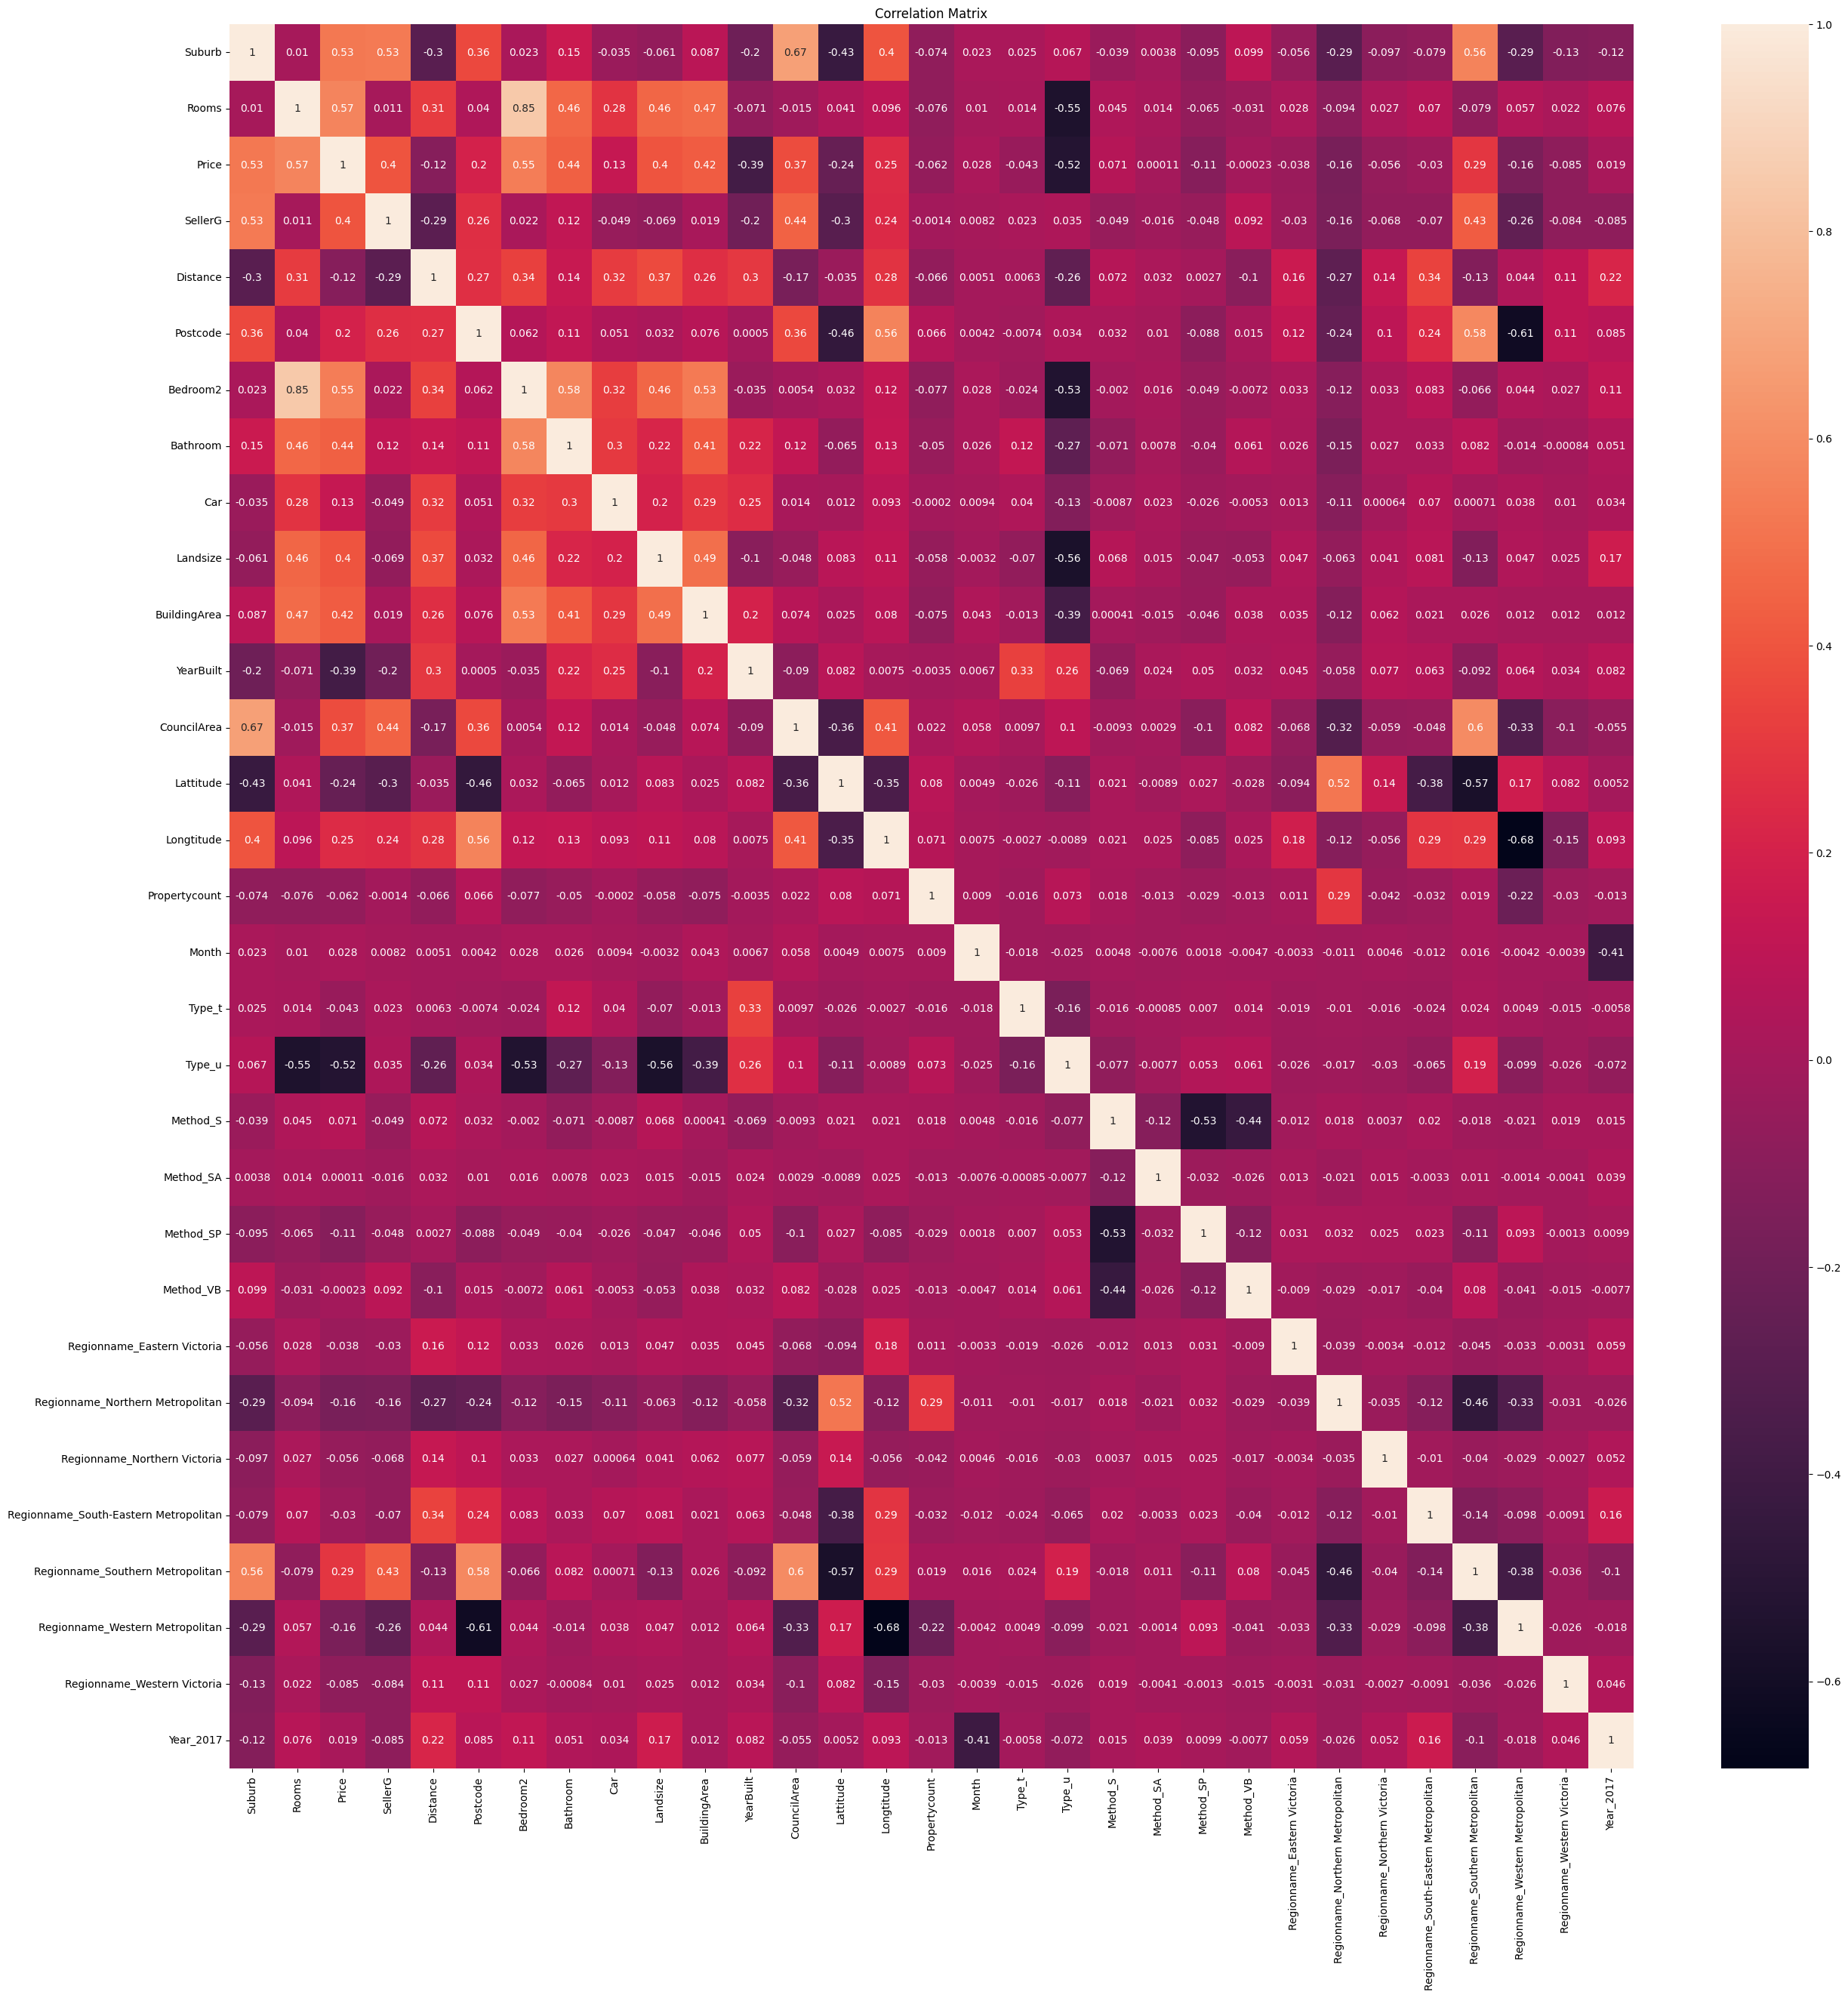

In [253]:
# Visualize correlations
plt.figure(figsize=(30, 30))
sns.heatmap(df_train_normal.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [254]:
# Split data into X_train, y_train, X_test, y_test
X_train_normal = df_train_normal.drop('Price', axis=1)
y_train_normal = df_train_normal['Price']
X_test_normal = df_test_normal.drop('Price', axis=1)
y_test_normal = df_test_normal['Price']

X_train_uniform = df_train_uniform.drop('Price', axis=1)
y_train_uniform = df_train_uniform['Price']
X_test_uniform = df_test_uniform.drop('Price', axis=1)
y_test_uniform = df_test_uniform['Price']

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">3. Model Building and Evaluation</div>

In [255]:
# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_normal, y_train_normal)
train_score = model_lr.score(X_train_normal, y_train_normal)
test_score = model_lr.score(X_test_normal, y_test_normal)
print(f'Linear Regression Train Score: {train_score}')
print(f'Linear Regression Test Score: {test_score}')
print(f'Linear Regression Train MSE: {mean_squared_error(y_train_normal, model_lr.predict(X_train_normal))}')
print(f'Linear Regression Test MSE: {mean_squared_error(y_test_normal, model_lr.predict(X_test_normal))}')

Linear Regression Train Score: 0.8130775993525355
Linear Regression Test Score: 0.8210639259552672
Linear Regression Train MSE: 0.18884291711853587
Linear Regression Test MSE: 0.1776910180191079


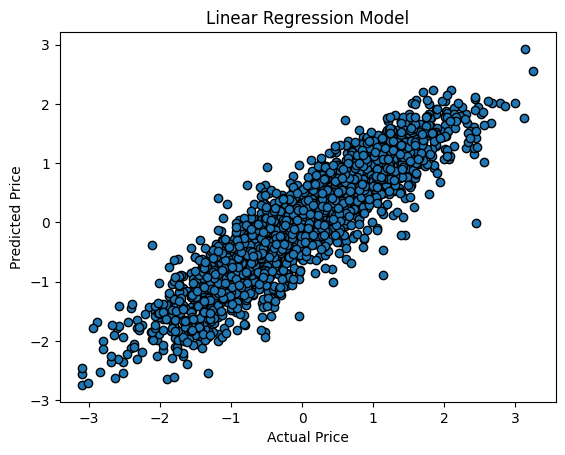

In [256]:
# Plot the results of the model
plt.figure()
plt.scatter(y_test_normal, model_lr.predict(X_test_normal), edgecolors='black')
plt.title('Linear Regression Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [257]:
# Train a RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X_train_uniform, y_train_uniform)
train_score = model_rf.score(X_train_uniform, y_train_uniform)
test_score = model_rf.score(X_test_uniform, y_test_uniform)
print(f'Random Forest Train Score: {train_score}')
print(f'Random Forest Test Score: {test_score}')
print(f'Random Forest Train MSE: {mean_squared_error(y_train_uniform, model_rf.predict(X_train_uniform))}')
print(f'Random Forest Test MSE: {mean_squared_error(y_test_uniform, model_rf.predict(X_test_uniform))}')

Random Forest Train Score: 0.9824859339962859
Random Forest Test Score: 0.8827053753221401
Random Forest Train MSE: 0.001462742038472014
Random Forest Test MSE: 0.009880073578520488


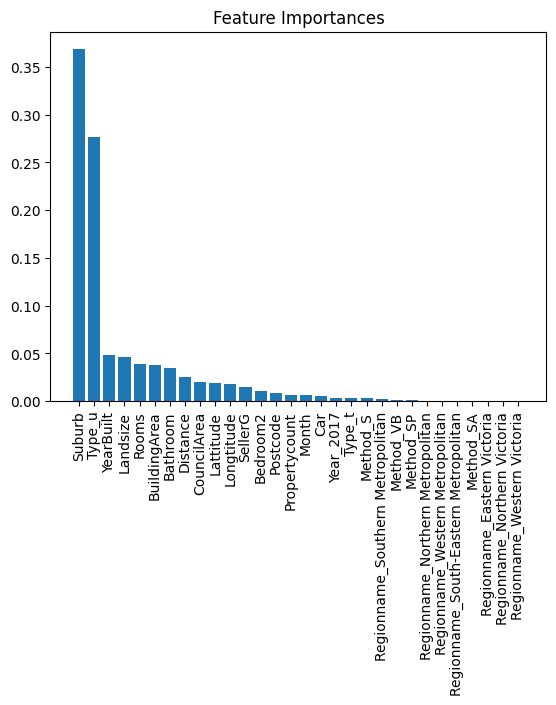

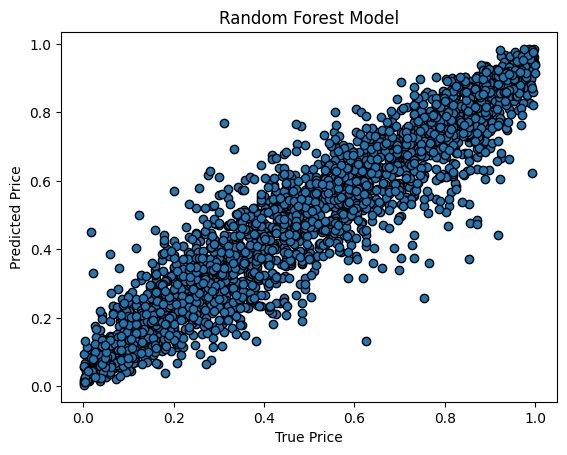

In [258]:
# Plot feature importances
plt.figure()
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train_uniform.shape[1]), importances[indices])
plt.xticks(range(X_train_uniform.shape[1]), X_train_uniform.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

# Plot the results of the model
plt.figure()
plt.scatter(y_test_uniform, model_rf.predict(X_test_uniform), edgecolors='black')
plt.title('Random Forest Model')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

In [259]:
# Train a KNeighborsRegressor model
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_uniform, y_train_uniform)
train_score = model_knn.score(X_train_uniform, y_train_uniform)
test_score = model_knn.score(X_test_uniform, y_test_uniform)
print(f'KNeighbors Train Score: {train_score}')
print(f'KNeighbors Test Score: {test_score}')
print(f'KNeighbors Train MSE: {mean_squared_error(y_train_uniform, model_knn.predict(X_train_uniform))}')
print(f'KNeighbors Test MSE: {mean_squared_error(y_test_uniform, model_knn.predict(X_test_uniform))}')

KNeighbors Train Score: 0.867155932784285
KNeighbors Test Score: 0.7967928523834613
KNeighbors Train MSE: 0.011094888053797478
KNeighbors Test MSE: 0.017116739796445613


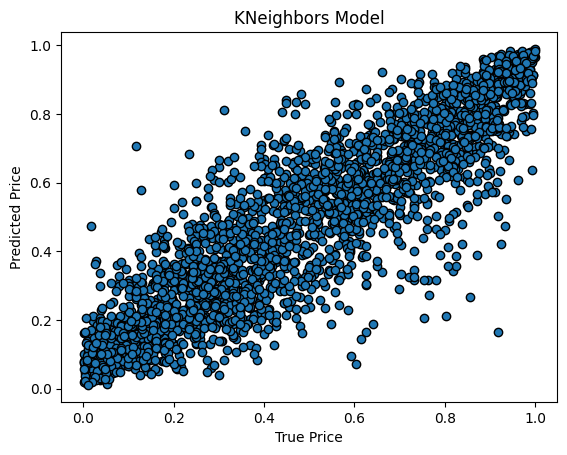

In [260]:
# Plot the results of the model
plt.figure()
plt.scatter(y_test_uniform, model_knn.predict(X_test_uniform), edgecolors='black')
plt.title('KNeighbors Model')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

In [261]:
# Perform GridSearchCV on RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1],
    'n_jobs': [-1]
}

model_rf_grid = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(model_rf_grid, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_uniform, y_train_uniform)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Test score: {grid_search.score(X_test_uniform, y_test_uniform)}')

# Evaluate the best model
model_rf_grid = grid_search.best_estimator_
train_score = model_rf_grid.score(X_train_uniform, y_train_uniform)
test_score = model_rf_grid.score(X_test_uniform, y_test_uniform)
print(f'Random Forest Uniform Train Score: {train_score}')
print(f'Random Forest Uniform Test Score: {test_score}')
print(f'Mean Squared Error: {mean_squared_error(y_test_uniform, model_rf_grid.predict(X_test_uniform))}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_jobs=-1; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_jobs=-1; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_jobs=-1; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_jobs=-1; total time=   2.0s
[CV] END max

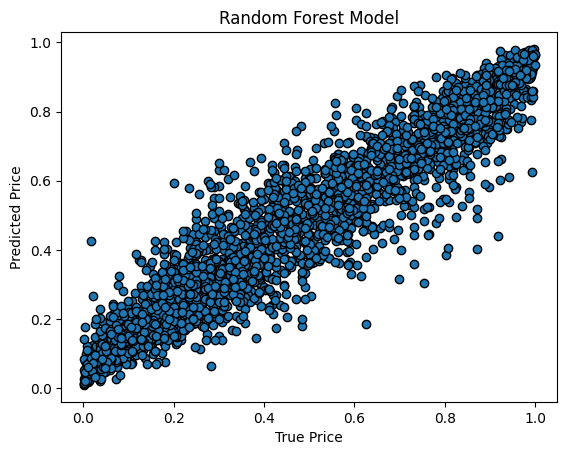

In [262]:
# Plot the results of the model
plt.figure()
plt.scatter(y_test_uniform, model_rf_grid.predict(X_test_uniform), edgecolors='black')
plt.title('Random Forest Model')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>As we can see, hyperparameter tuning didn't improve the results in a meaningful way.</b>
 </div>
